In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage,cv2
from skimage import io, transform
from tqdm import tqdm
from copy import copy
from tools import *
from reload import *
from sklearn.svm import LinearSVR

%matplotlib inline

In [2]:
dataset = reload()

[ Load Dataset ]: 100%|██████████| 1278056/1278056 [19:12<00:00, 1109.10it/s] 


Modeling
-------------------------------------------------------------

In [3]:
train_x_1D=np.array(dataset.train_x_dataset).reshape(len(dataset.train_x_dataset),-1)
del dataset.train_x_dataset
train_y_1D=np.array(dataset.train_y_dataset).reshape(len(dataset.train_y_dataset),-1)
del dataset.train_y_dataset
train_z_1D=np.array(dataset.train_z_dataset).reshape(len(dataset.train_z_dataset),-1)
del dataset.train_z_dataset

test_x_1D=np.array(dataset.test_x_dataset).reshape(len(dataset.test_x_dataset),-1)
del dataset.test_x_dataset
test_y_1D=np.array(dataset.test_y_dataset).reshape(len(dataset.test_y_dataset),-1)
del dataset.test_y_dataset
test_z_1D=np.array(dataset.test_z_dataset).reshape(len(dataset.test_z_dataset),-1)
del dataset.test_z_dataset

In [4]:
# data suffling
x_data = copy(train_x_1D)
labels = np.array(copy(dataset.train_x_labels))

indices = np.random.permutation(len(x_data))
x_data = x_data[indices]
labels = labels[indices]

## SGDClassification

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix

train_data_batches = list()
train_labels_batches = list()
batch_size=100

clf = SGDClassifier()
clf.fit(x_data, labels)


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [7]:
result_sgd = clf.predict(test_x_1D)

In [8]:
sgd_conf=confusion_matrix(result_sgd, dataset.test_x_labels)

0.3167521070466591


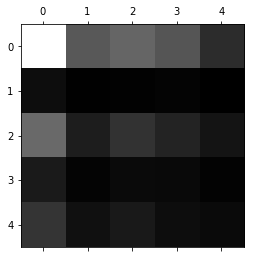

In [9]:
print(sum(sgd_conf[i,i] for i in range(len(sgd_conf)))/len(result_sgd))
plt.matshow(sgd_conf, cmap=plt.cm.gray)

## MultiClass

In [11]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_data, labels)
result_ovo=ovo_clf.predict(test_x_1D)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.5/dist-packages/s

In [12]:
ovo_conf=confusion_matrix(result_ovo,dataset.test_x_labels)

0.32142960581573843


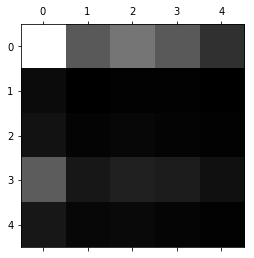

In [13]:
print(sum(ovo_conf[i,i] for i in range(len(ovo_conf)))/len(result_ovo))
plt.matshow(ovo_conf, cmap=plt.cm.gray)

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(x_data, labels)
result_fc = forest_clf.predict(test_x_1D)

In [16]:
fc_conf=confusion_matrix(result_fc,dataset.test_x_labels)

0.37450401135343353


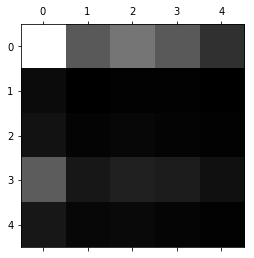

In [17]:
print(sum(fc_conf[i,i] for i in range(len(fc_conf)))/len(result_fc))
plt.matshow(ovo_conf, cmap=plt.cm.gray)

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=2)
knn_clf.fit(x_data, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
           weights='distance')

In [ ]:
result_knn = knn_clf.predict(test_x_1D)

In [21]:
from sklearn.metrics import confusion_matrix
kn_conf=confusion_matrix(result_knn,dataset.test_x_labels)

0.3113215744200191


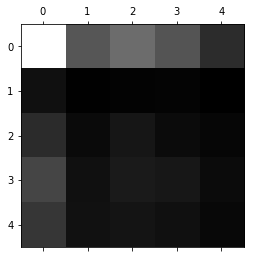

In [22]:
print(sum(kn_conf[i,i] for i in range(len(kn_conf)))/len(result_knn))
plt.matshow(kn_conf, cmap=plt.cm.gray)